In [ ]:
import pandas as pd
import numpy as np

# Read the two CSV files
df1 = pd.read_csv('/content/invoice-ppocr.csv')
df2 = pd.read_csv('/content/other-ppocr.csv')

# Concatenate the two dataframes
df = pd.concat([df1, df2])

# Shuffle the rows randomly
df = df.sample(frac=1).reset_index(drop=True)

# Write the shuffled dataframe to a new CSV file
df.to_csv('shuffled-ppocr.csv', index=False)

In [ ]:
import pandas as pd
df = pd.read_csv('shuffled-ppocr.csv')

In [ ]:
df

,Extracted Text,category
0,thv1 SARKANSAS DRIVER'S LICENSE CLASsD aDLN 99...,Other
1,"NAYARA ENERGY PATEL PETROLEUM UTRAN,NR.VIP CIR...",Invoice
2,Aiizona DRIVERLICENSE USA 9 CLASS D 4DLN D3410...,Other
3,WA DRIVERLICENSE WASHINGTON USA 4aLIC#NEBELMA2...,Other
4,tan chay yee SOON HUAT MACHINERY ENTERPRISE (J...,Invoice
...,...,...
1422,DRIVERLICENSE WA WASHNGTON USA FEDERALLIMITS A...,Other
1423,YASGXSINDIANACERTIFICATEOFTITLEAXOGAY STATE OF...,Other
1424,Breay fETHTST HRARR NCOME TAX DEPARTME GOVT.OF...,Other
1425,CROSSWAYS 11 Trouble his sleeping: give him dr...,Other


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1427 entries, 0 to 1426
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Extracted Text  1427 non-null   object
 1   category        1427 non-null   object
dtypes: object(2)
memory usage: 22.4+ KB


In [ ]:
df.isnull().sum()

Extracted Text    0
category          0
dtype: int64

In [ ]:
print(df['category'].value_counts())


Invoice    826
Other      601
Name: category, dtype: int64


<Axes: xlabel='category'>

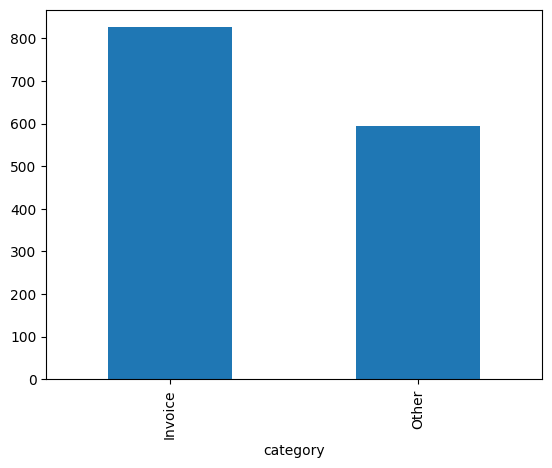

In [ ]:
df.groupby(['category']).size().plot.bar()


In [ ]:
text = df['Extracted Text'].values
print(len(text))
print(text)

1427
["thv1 SARKANSAS DRIVER'S LICENSE CLASsD aDLN 999999999 9DOB03/05/1960 SAMPLE NICK 123NORTHSTREET CITY.AR 12345 ISS 4bEXP 1S6 03/05/2018 03/05/2026 SEX16HGT 18EYES 5-10 BRO WHAT DO YOU THINK ABOUT THE NEW DRIVERS LICENSE DESIGN? REALLY LIKEIT! ILIKETHE OLD ONE BETTER IDON'T CARE 0% 29% 29% thv11.com/vote"
 'NAYARA ENERGY PATEL PETROLEUM UTRAN,NR.VIP CIRCLE, SURAT-394105. Bi11 No:Oct-151338-DUPLT Trns.ID: Atnd.ID: Receipt:No Receipt Vehi.No:NotEntered Mob.No :NotEntered :14/10/2021 Date 1336:57 Time FP. ID :1 Nozl No:1 Fuel :PETROL Preset :Rs.615 :Rs.101.72 Rate Sale :Rs.615.00 Volume :6.05Lts. VAT NO.-24222501554 WELCOME VISIT AGAIN'
 "Aiizona DRIVERLICENSE USA 9 CLASS D 4DLN D34107622 9ENDNONE 12 REST NONE 3DOB06/13/1999 SUSAN MORGAN LINDSEY 777CALVERTON PL PHOENIX,AZ 85016-2457 202 EXP06/13/2042ISS 06/1 15SEXF 18EYESGRN 16 HGT5'-0319HAIR BRO 17 WGT 110 lb 06/13/99 rorgan Susan 5 DD 1725C4234P1608D9"
 ...
 "Breay fETHTST HRARR NCOME TAX DEPARTME GOVT.OF INDIA Permanent Account Nu

In [ ]:
# !pip install simpletransformers

In [ ]:
!pip install transformers

In [ ]:
# from simpletransformers.language_representation import RepresentationModel

# model = RepresentationModel(
#         model_type="bert",
#         model_name="distilbert-base-uncased",
#         use_cuda=False
#     )

You are using a model of type distilbert to instantiate a model of type bert. This is not supported for all configurations of models and can yield errors.


Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing BertForTextRepresentation: ['distilbert.transformer.layer.5.attention.q_lin.weight', 'distilbert.transformer.layer.3.sa_layer_norm.bias', 'distilbert.transformer.layer.5.ffn.lin1.weight', 'distilbert.transformer.layer.5.attention.out_lin.weight', 'distilbert.transformer.layer.0.attention.q_lin.weight', 'distilbert.transformer.layer.0.attention.k_lin.weight', 'distilbert.transformer.layer.5.output_layer_norm.bias', 'distilbert.transformer.layer.3.attention.v_lin.bias', 'distilbert.transformer.layer.1.sa_layer_norm.weight', 'distilbert.transformer.layer.3.attention.q_lin.weight', 'distilbert.transformer.layer.4.ffn.lin2.weight', 'distilbert.transformer.layer.3.ffn.lin2.bias', 'distilbert.transformer.layer.3.output_layer_norm.weight', 'distilbert.transformer.layer.3.attention.k_lin.weight', 'distilbert.transformer.layer.4.ffn.lin1.weight', 'distilbert.transformer.layer.2.attention.k_lin.bias', 

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'DistilBertTokenizer'. 
The class this function is called from is 'BertTokenizer'.


In [ ]:
# word_vectors = model.encode_sentences(text, combine_strategy='mean')
# print(word_vectors.shape)

(1427, 768)


In [ ]:
import pickle
# from xgboost import XGBClassifier
# from simpletransformers.language_representation import RepresentationModel

import torch
from tqdm import tqdm
from transformers import AutoModel, AutoTokenizer
import pandas as pd

device = 'cuda' if torch.cuda.is_available() else 'cpu'

tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")
model = AutoModel.from_pretrained("distilbert-base-uncased").to(device)



class EmbeddingsGenerator:
    def __mean_pooling(self, model_output, attention_mask):
        token_embeddings = model_output[0]
        input_mask_expanded = attention_mask.unsqueeze(-1).expand(token_embeddings.size()).float()
        return torch.sum(token_embeddings * input_mask_expanded, 1) / torch.clamp(input_mask_expanded.sum(1), min=1e-9)

    def generate_text_embeddings(self, inputs, batch_size=32):
        """ The method generates BERT embeddings from given text using pre-trained transformer """

        embeddings = []
        for i in tqdm(range(0, len(inputs), batch_size)):
            batch_text = inputs[i:i + batch_size]
            encoded_input = tokenizer(batch_text, padding=True, truncation=True, return_tensors='pt', max_length=400).to(device)
            with torch.no_grad():
                model_output = model(**encoded_input)
            sentence_embeddings_chunk = self.__mean_pooling(model_output, encoded_input['attention_mask'])
            embeddings_tensor = sentence_embeddings_chunk.cpu().numpy().tolist()
            embeddings.extend(embeddings_tensor)

        return embeddings

embeddings = EmbeddingsGenerator()

In [ ]:
import pandas as pd
df = pd.read_csv('/content/shuffled-ppocr.csv')
# df = pd.read_csv('shuffled-ppocr.csv')
inputs = df['Extracted Text'].values

In [ ]:
print(inputs.tolist())

In [ ]:
word_vectors = embeddings.generate_text_embeddings(inputs.tolist())

In [ ]:
print(len(word_vectors),len(word_vectors[0]))

In [ ]:
# import pickle

# # Saving the word_vectors numpy array as a pickle file
# with open('DISTILBERT-PPOCR-WV.pkl', 'wb') as f:
#     pickle.dump(word_vectors, f)


In [ ]:
# import pickle
# with open('/content/DISTILBERT-PPOCR-WV.pkl','rb') as f:
#     word_vectors = pickle.load(f)
# print(word_vectors.shape)

(1427, 768)


In [ ]:
# print(word_vectors)

[[ 0.48378366 -0.08945767  0.54806453 ...  2.6295338  -0.98793846
   0.36460996]
 [ 0.39010882  0.02088827  0.41769958 ...  2.781045   -0.843075
   0.36707357]
 [ 0.54527634 -0.01868175  0.45766395 ...  2.5894763  -1.0854337
   0.25909567]
 ...
 [ 0.71412903  0.10446675  0.46127892 ...  2.694195   -1.0951167
   0.24579428]
 [ 0.4267758  -0.10991358  0.25918412 ...  2.5722556  -0.9501437
   0.38971978]
 [ 0.4687248  -0.06274908  0.2261653  ...  2.5388992  -0.9997381
   0.46461776]]


###**RF Classifier**

In [ ]:
# from sklearn.model_selection import train_test_split

# # Split into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(word_vectors, df.category.values, test_size=0.3, random_state=100)

# # Split the train set into train and validation sets
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=100)


In [ ]:
# from sklearn import ensemble
# from sklearn.metrics import classification_report

# # Train the model on the training set
# rf_clf = ensemble.RandomForestClassifier()
# rf_clf.fit(X_train, y_train)

# # Evaluate the model on the validation set
# print("Validation Accuracy:", rf_clf.score(X_val, y_val))

# # Evaluate the model on the test set
# print("Test Accuracy:", rf_clf.score(X_test, y_test))

Validation Accuracy: 0.97
Test Accuracy: 0.9696969696969697


In [ ]:
# X_val

array([[ 0.05544105, -0.11358515,  0.04510422, ...,  0.27501315,
         0.41329366,  0.195298  ],
       [ 0.03348283, -0.21627545,  0.04993415, ...,  0.35908374,
         0.39805844,  0.20515583],
       [ 0.0218591 , -0.18818538,  0.00083836, ...,  0.22588834,
         0.2849    ,  0.1827803 ],
       ...,
       [-0.04613215, -0.21977565,  0.16026749, ...,  0.2999623 ,
         0.47899753,  0.14590777],
       [ 0.11903458, -0.18621226,  0.19515105, ...,  0.49570864,
         0.3438754 ,  0.10884772],
       [ 0.29195103, -0.23527274, -0.07242248, ...,  0.1349699 ,
         0.38668042,  0.47265184]], dtype=float32)

In [ ]:
# y_pred = rf_clf.predict(X_test)
# print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

     Invoice       0.97      0.98      0.97       248
       Other       0.97      0.96      0.96       181

    accuracy                           0.97       429
   macro avg       0.97      0.97      0.97       429
weighted avg       0.97      0.97      0.97       429



In [ ]:
# string = "y GUJARAT TECHNOLOGICAL UNIVERSITY 4 (Established under Gujarat Act No. 20 of 2007) S&S aAweudesedldlosa yma (2A WMA SHis: 20/2009 siz utc) Annexure 2 Feedback Form by Industry expert Student Name: Joshi Darshan Yogeshbhai Date: 02/05/2023 Work Supervisor: Mr. Siddharth Bhavsar Title: Data Science Intern Company/Organization: Maruti Techlabs Private Limited Enrollment No: 190170107039 Internship Address: 302, Regency Plaza, Nr. Anandnagar Crossroads, Satellite, Anmedabad, Gujarat 380015 Dates of Internship: From 23/01/2023 to 23/04/2023 Please evaluate your intern by indicating the frequency with which you observed the following behaviors: improvement Sowrinein waarmee sage responsibilit v Uteinetiwwisieawewee a a Overall performance of student intern: (Needs improvement/ Satisfactory/Good/Excellgnt: Additional comments, if any: Signature of Industry person with name and Stamp: Signature of the Faculty Mentor"
# string = string.strip()
# print(len(string))
# print(string)

922
y GUJARAT TECHNOLOGICAL UNIVERSITY 4 (Established under Gujarat Act No. 20 of 2007) S&S aAweudesedldlosa yma (2A WMA SHis: 20/2009 siz utc) Annexure 2 Feedback Form by Industry expert Student Name: Joshi Darshan Yogeshbhai Date: 02/05/2023 Work Supervisor: Mr. Siddharth Bhavsar Title: Data Science Intern Company/Organization: Maruti Techlabs Private Limited Enrollment No: 190170107039 Internship Address: 302, Regency Plaza, Nr. Anandnagar Crossroads, Satellite, Anmedabad, Gujarat 380015 Dates of Internship: From 23/01/2023 to 23/04/2023 Please evaluate your intern by indicating the frequency with which you observed the following behaviors: improvement Sowrinein waarmee sage responsibilit v Uteinetiwwisieawewee a a Overall performance of student intern: (Needs improvement/ Satisfactory/Good/Excellgnt: Additional comments, if any: Signature of Industry person with name and Stamp: Signature of the Faculty Mentor


In [ ]:
# string_embd = model.encode_sentences([string], combine_strategy='mean')
# print(string_embd.shape)

(1, 768)


In [ ]:
# category = rf_clf.predict(string_embd)
# category

array(['Invoice'], dtype=object)

###**XGB Classifier**

In [ ]:
from xgboost import XGBClassifier

In [ ]:
from sklearn.model_selection import train_test_split

# Split into train and test sets
X_train1, X_test1, y_train1, y_test1 = train_test_split(word_vectors, df.category.values, test_size=0.3, random_state=42)

# Split the train set into train and validation sets
X_train1, X_val1, y_train1, y_val1 = train_test_split(X_train1, y_train1, test_size=0.2, random_state=42)

In [ ]:
li = ['Invoice', 'Other']

for i in range(len(y_train1)):
    y_train1[i] = li.index(y_train1[i])
for i in range(len(y_test1)):
    y_test1[i] = li.index(y_test1[i])
for i in range(len(y_val1)):
    y_val1[i] = li.index(y_val1[i])

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn import ensemble
from sklearn.metrics import classification_report

# Train the model on the training set
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train1, y_train1)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
with open('embed-XGB-DOC-CLF.pkl', 'wb') as f:
    pickle.dump(xgb_clf, f)

In [ ]:
y_val_pred = xgb_clf.predict(X_val1)
val_acc = accuracy_score(y_val1.tolist(), y_val_pred)

# make predictions on test set
y_test_pred = xgb_clf.predict(X_test1)
test_acc = accuracy_score(y_test1.tolist(), y_test_pred)

print('Validation accuracy:', val_acc)
print('Test accuracy:', test_acc)

Validation accuracy: 0.975
Test accuracy: 0.972027972027972


In [ ]:
print("Classification Report:\n", classification_report(y_test1.tolist(), y_test_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98       245
           1       0.97      0.96      0.97       184

    accuracy                           0.97       429
   macro avg       0.97      0.97      0.97       429
weighted avg       0.97      0.97      0.97       429



In [ ]:
!pip install paddlepaddle

In [ ]:
!pip install paddleocr

In [ ]:
from paddleocr import PaddleOCR


ocr = PaddleOCR(use_angle_cls=True, lang='en')
image_path = '/content/image (7).png'
result = ocr.ocr(image_path, cls=True)
result = result[0]
text_list = [line[1][0] for line in result]
text = " ".join(text_list)

[2023/05/12 10:48:36] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/root/.paddleocr/whl/rec/en/en_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, rec_char_dict_path='/usr/local

In [ ]:
text

'A/CPAYEEONLY ah.att 121009 OD Date PayA Sample Payee rBe y RueesOne Lac Twenty Three Thousand Five Hundred Five Rupees Only .Rs.123,505.00 Alc.Na. LF NTLS CDTaSCANARABANK'

In [ ]:
import pickle
with open('/content/embed-XGB-DOC-CLF.pkl','rb') as f:
    xgb_clf = pickle.load(f)

In [ ]:
string = "**INVOICE** MEHFILRESTAURANT OppCyber Towers,Madhapur,Hyd Chevella Road Hyd-91 GSTIN:36ABHFM3416C1ZM Ph(s):04066020121 No.00147 Date:14-10-18 Cash Time:19:51 Operator operator2 Table No. 7 Kot No:221 QTY RATE AMOUNT PRODUCT 1 180 180 Chicken Lollipop 100 100 Hot &Sour Chicken Soup1 80 80 Sweet Corn Soup Veg 9.00 Add: CGST @2.5% 9.00 Add:SGST @2.5% 378 Bill Amount(TotQty3) Terms &Conditions Goods once sold cannot be taken back or exchanged THANK Q-VISIT AGAIN"
# string = string.strip()
print(len(string))
print(string)

462
**INVOICE** MEHFILRESTAURANT OppCyber Towers,Madhapur,Hyd Chevella Road Hyd-91 GSTIN:36ABHFM3416C1ZM Ph(s):04066020121 No.00147 Date:14-10-18 Cash Time:19:51 Operator operator2 Table No. 7 Kot No:221 QTY RATE AMOUNT PRODUCT 1 180 180 Chicken Lollipop 100 100 Hot &Sour Chicken Soup1 80 80 Sweet Corn Soup Veg 9.00 Add: CGST @2.5% 9.00 Add:SGST @2.5% 378 Bill Amount(TotQty3) Terms &Conditions Goods once sold cannot be taken back or exchanged THANK Q-VISIT AGAIN


In [ ]:
string_embd = embeddings.generate_text_embeddings([string])


(1, 768)


In [ ]:
category = xgb_clf.predict(string_embd)
category